# Saúde Mental de Estudantes

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [181]:
df = pd.read_csv('Student Mental Health.csv')

In [182]:
df.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


In [183]:
df.columns

Index(['gender', 'age', 'university', 'degree_level', 'degree_major',
       'academic_year', 'cgpa', 'residential_status', 'campus_discrimination',
       'sports_engagement', 'average_sleep', 'study_satisfaction',
       'academic_workload ', 'academic_pressure', 'financial_concerns',
       'social_relationships', 'depression', 'anxiety', 'isolation',
       'future_insecurity', 'stress_relief_activities'],
      dtype='object')

### Renomeando colunas e resultados:

In [184]:
df_columns = {'gender':'Gênero','academic_year':'Ano Acadêmico','sports_engagement':'Participação em esportes','average_sleep':'Média de Sono', 
              'study_satisfaction':'Satisfação com Estudos', 'academic_pressure':'Pressão Acadêmica','financial_concerns':'Preocupações Financeiras',
              'social_relationships':'Relacionamentos Sociais','depression':'Depressão','anxiety':'Ansiedade', 'isolation':'Isolamento', 
              'future_insecurity':'Insegurança com o Futuro','stress_relief_activities':'Atividades para Alivio de Stress'}
df.rename(columns=df_columns, inplace=True)

df['Gênero'] = df['Gênero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})

traducao_atividades = {
    'Religious Activities': 'Atividades Religiosas','Online Entertainment': 'Entretenimento Online','Social Connections': 'Conexões Sociais',
    'Sports and Fitness': 'Esportes e Fitness','Sleep': 'Dormir','Outdoor Activities': 'Atividades ao Ar Livre',
    'Creative Outlets': 'Atividades Criativas','Nothing': 'Nada'
}

### Contando frequência de cada gênero na pesquisa:

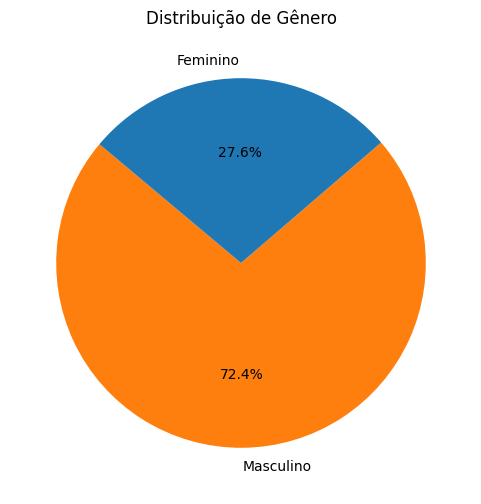

In [208]:
cores_personalizadas = ['#ff7f0e', '#1f77b4'] 
contagem_genero = df['Gênero'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(contagem_genero, labels=contagem_genero.index, autopct='%1.1f%%', startangle=140, colors=cores_personalizadas)

plt.title('Distribuição de Gênero')

plt.show()

### Média de depressão por gênero

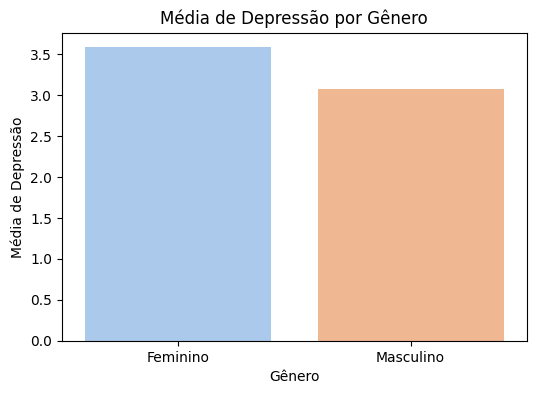

In [207]:
media_depressao_por_genero = df.groupby('Gênero')['Depressão'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='Gênero', y='Depressão', data=media_depressao_por_genero, palette='pastel', hue='Gênero')

plt.title('Média de Depressão por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de Depressão')

plt.legend([],[], frameon=False)
plt.show()

### Média de ansiedade por gênero

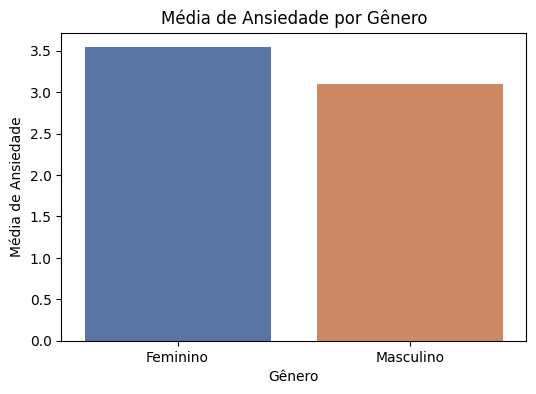

In [206]:
media_ansiedade_por_genero = df.groupby('Gênero')['Ansiedade'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='Gênero', y='Ansiedade', data=media_ansiedade_por_genero, palette='deep', hue='Gênero')

# Adicionar título e rótulos
plt.title('Média de Ansiedade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de Ansiedade')

plt.legend([],[], frameon=False)
# Mostrar o gráfico
plt.show()

### Relação entre média de sono, depressão e ansiedade

Agrupando os dados pela média de sono e calcular a média dos níveis de depressão e ansiedade

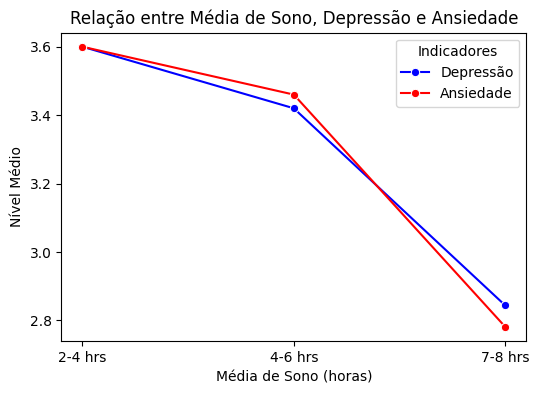

In [209]:
df_grouped = df.groupby('Média de Sono').agg({'Depressão': 'mean', 'Ansiedade': 'mean'}).reset_index()

plt.figure(figsize=(6, 4))

sns.lineplot(x='Média de Sono', y='Depressão', data=df_grouped, marker='o', color='b', label='Depressão')
sns.lineplot(x='Média de Sono', y='Ansiedade', data=df_grouped, marker='o', color='r', label='Ansiedade')

plt.title('Relação entre Média de Sono, Depressão e Ansiedade')
plt.xlabel('Média de Sono (horas)')
plt.ylabel('Nível Médio')
plt.legend(title='Indicadores')

plt.show()

### Relação entre prática de esportes, depressão e ansiedade

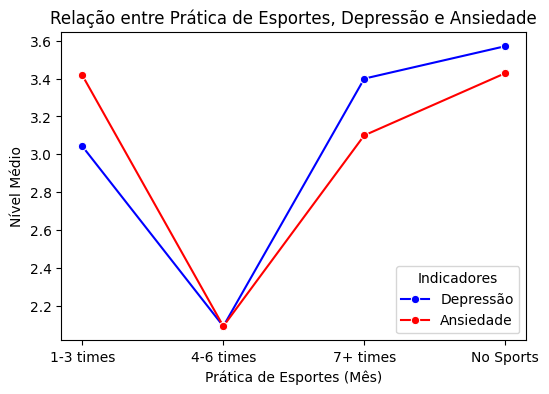

In [204]:
df_grouped = df.groupby('Participação em esportes').agg({'Depressão': 'mean', 'Ansiedade': 'mean'}).reset_index()

plt.figure(figsize=(6, 4))

sns.lineplot(x='Participação em esportes', y='Depressão', data=df_grouped, marker='o', label='Depressão', color='b')
sns.lineplot(x='Participação em esportes', y='Ansiedade', data=df_grouped, marker='o', label='Ansiedade', color='r')

plt.title('Relação entre Prática de Esportes, Depressão e Ansiedade')
plt.xlabel('Prática de Esportes (Mês)')
plt.ylabel('Nível Médio')

plt.legend(title='Indicadores')

plt.show()

### Relação entre isolamento social e satisfação nos estudos

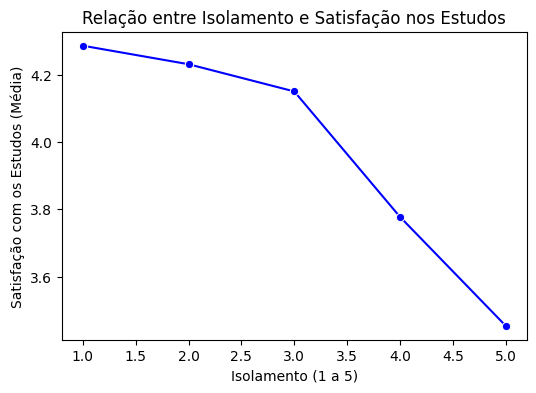

In [203]:
df_grouped = df.groupby('Isolamento')['Satisfação com Estudos'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.lineplot(x='Isolamento', y='Satisfação com Estudos', data=df_grouped, marker='o', color='b')

plt.title('Relação entre Isolamento e Satisfação nos Estudos')
plt.xlabel('Isolamento (1 a 5)')
plt.ylabel('Satisfação com os Estudos (Média)')

plt.show()

### Mapa de Calor: Correlações entre Fatores Acadêmicos e Psicológicos

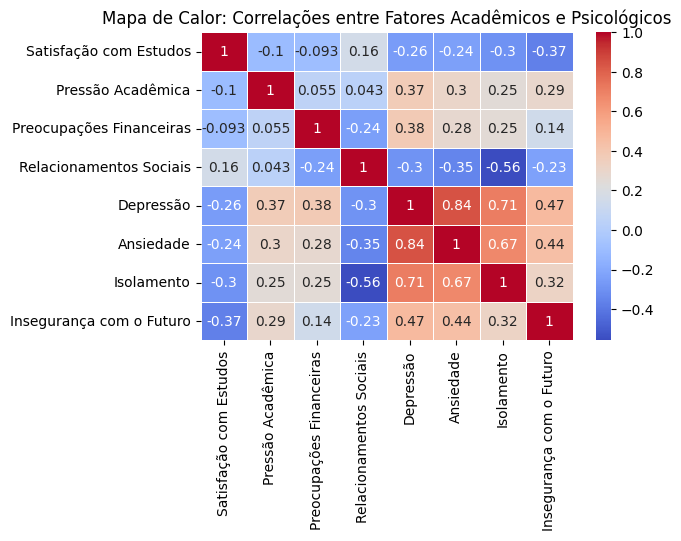

In [200]:
colunas_interesse = ['Satisfação com Estudos', 'Pressão Acadêmica', 'Preocupações Financeiras', 
                     'Relacionamentos Sociais', 'Depressão', 'Ansiedade', 
                     'Isolamento', 'Insegurança com o Futuro']

correlation_matrix = df[colunas_interesse].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor: Correlações entre Fatores Acadêmicos e Psicológicos')

plt.show()

### Tratando dados e contando atividades para alívio de stress

In [192]:
df['Atividades para Alivio de Stress'] = df['Atividades para Alivio de Stress'].fillna('')
df['atividades_separadas'] = df['Atividades para Alivio de Stress'].str.split(r'[;,]')

atividades_explodidas = atividades_explodidas[atividades_explodidas['atividades_separadas'] != '']
contagem_atividades = atividades_explodidas['atividades_separadas'].value_counts()

atividades_explodidas['atividades_separadas'] = atividades_explodidas['atividades_separadas'].replace(traducao_atividades)

contagem_atividades_traduzidas = atividades_explodidas['atividades_separadas'].value_counts()

print(contagem_atividades_traduzidas)

atividades_separadas
Atividades Religiosas     46
Entretenimento Online     11
Conexões Sociais           8
Esportes e Fitness         6
Dormir                     6
Atividades ao Ar Livre     5
Atividades Criativas       4
Nada                       1
Name: count, dtype: int64


### Tratando dados duplicados

In [196]:
duplicatas_colunas = atividades_explodidas.columns[atividades_explodidas.columns.duplicated()].tolist()
duplicatas_indices = atividades_explodidas.index[atividades_explodidas.index.duplicated()].tolist()
atividades_explodidas = atividades_explodidas.loc[:, ~atividades_explodidas.columns.duplicated()]
atividades_explodidas = atividades_explodidas[~atividades_explodidas.index.duplicated(keep='first')]

### Mapa de Calor: Atividades vs Níveis de Depressão

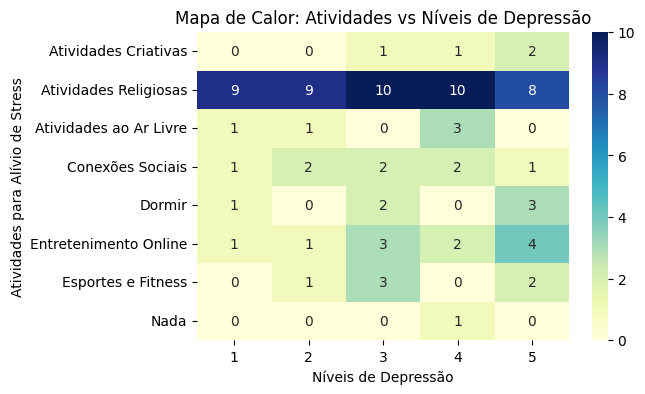

In [201]:
tabela_cruzada_depressao = pd.crosstab(atividades_explodidas['atividades_separadas'], df['Depressão'])
tabela_cruzada_ansiedade = pd.crosstab(atividades_explodidas['atividades_separadas'], df['Ansiedade'])

plt.figure(figsize=(6, 4))
sns.heatmap(tabela_cruzada_depressao, cmap='YlGnBu', annot=True, fmt='d', cbar=True)

plt.title('Mapa de Calor: Atividades vs Níveis de Depressão')
plt.xlabel('Níveis de Depressão')
plt.ylabel('Atividades para Alívio de Stress')

plt.show()


### Mapa de Calor: Atividades vs Níveis de Ansiedade

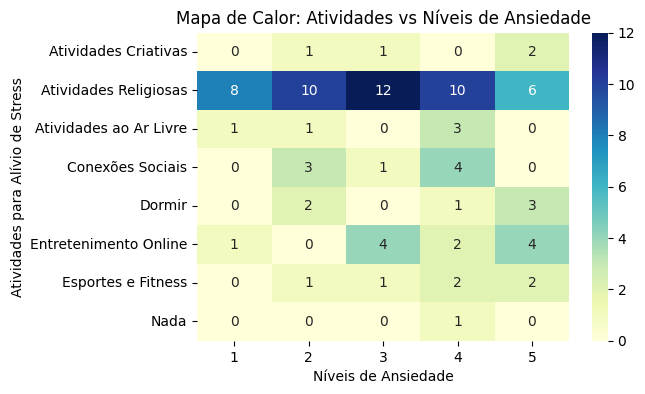

In [202]:
plt.figure(figsize=(6, 4))
sns.heatmap(tabela_cruzada_ansiedade, cmap='YlGnBu', annot=True, fmt='d', cbar=True)

plt.title('Mapa de Calor: Atividades vs Níveis de Ansiedade')
plt.xlabel('Níveis de Ansiedade')
plt.ylabel('Atividades para Alívio de Stress')

plt.show()